In [202]:
import matplotlib.pyplot as plt

import pandas as pd

from numpy import *

from statistics import *

import plotly.express as px

import plotly.graph_objects as go

import seaborn as sns

import dfply

from dfply import *

import pandas as pd

from plotnine import *

from plotnine.data import *


                                                    Read in data

In [2]:

EssayFilePath = "C:/Users/mbles/Desktop/Vaccines are Beneficial.txt"

ResumeFilePath = "C:/Users/mbles/Desktop/Resume.txt"

LabFilePath = "C:/Users/mbles/Desktop/EEE 334 Lab 1.txt"


EssayLines = ""

Resumelines = ""

LabLines = ""


def Read(FilePath, lines):
    with open(FilePath, "r", encoding = 'utf-8') as File:
        lines = File.read()
    return(lines)

    
EssayText = Read(EssayFilePath, EssayLines)

ResumeText = Read(ResumeFilePath, Resumelines)

LabText = Read(LabFilePath, LabLines)

                                                Clean  and Sort Data

In [184]:
non_letter_characters = ['[','@','_','!','#','$','%','^','&','*',
                      '(',')','<','>','?','/', '}','{','~',':',']',
                         ',','0', '1','2','3','4','5','6','7','8',
                         '9','\t','\n', ' ', '"', "'", '-','.',';',
                         '=','—','-','–','‘','“','”','\ufeff','…','’',
                         '\\\\', '\\', " \ ", ' n ', '  ','    ','   ',
                         '  n ', '⋅', '→','|', '〖', '〗','√','ω','μ','µa',
                         'π','+','δ','°','≈','\u2008','\u2008f','\u2061',
                         '∫','▒','±','●','δ','ω', 'ω	', 'µ', 'δ']

def CleanData(Text):
    for i in non_letter_characters:
        Text = Text.replace(i,' ')
    
    Text = Text.lower()
    
    return(Text)

EssayText = CleanData(EssayText)

ResumeText = CleanData(ResumeText)

LabText = CleanData(LabText) 

                                                 Get Letter Frequencies  

In [189]:
def GetFrequencies(Text):  
    LetterFrequencies = {}
    for keys in Text:
        LetterFrequencies[keys] = LetterFrequencies.get(keys, 0) + 1
    return(LetterFrequencies)

EssayFrequencyDict = GetFrequencies(EssayText)

ResumeFrequencyDict = GetFrequencies(ResumeText)

LabFrequencyDict = GetFrequencies(LabText)

                                                Convert to Data Frames and Sort

In [237]:
def ConvertAndSort(FrequencyDict, column2):
    Frequency_df = pd.DataFrame(FrequencyDict.items(), columns=['Letter', column2]) 

    Frequency_df = Frequency_df.sort_values("Letter")

    Frequency_df = Frequency_df[Frequency_df.Letter != " "].reset_index()
    
    Frequency_df.pop('index')
    
    return(Frequency_df)
    
EssayFrequency_df = ConvertAndSort(EssayFrequencyDict, 'Essay Frequency')

ResumeFrequency_df = ConvertAndSort(ResumeFrequencyDict, 'Resume Frequency')

LabFrequency_df = ConvertAndSort(LabFrequencyDict, 'Lab Frequency')


                                                Merge Dataframes and get Summary Stats

In [241]:
temp = pd.concat([EssayFrequency_df, ResumeFrequency_df], axis = 1, join = 'outer')

merged_data = pd.concat([temp, LabFrequency_df], axis = 1, join = 'outer')

merged_data
   
SummaryStats = merged_data.describe()
SummaryStats = SummaryStats.round(decimals = 2)
SummaryStats

#print(merged_data.head())
    
#merged_data.melt(value_vars = ['Essay Frequency', 'Resume Frequency', 'Lab Frequency'], id_vars = [merged_data.iloc[:,0]])



,Essay Frequency,Resume Frequency,Lab Frequency
count,26.00,26.00,26.00
mean,530.85,110.31,479.15
std,477.23,95.49,392.03
min,7.00,5.00,14.00
25%,189.00,27.25,197.00
50%,332.00,93.00,375.00
75%,864.25,185.00,809.00
max,1901.00,300.00,1471.00


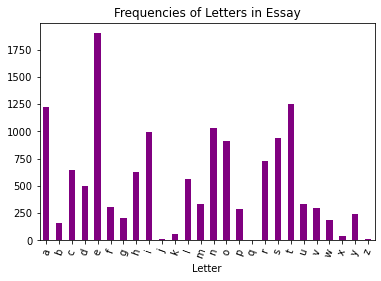

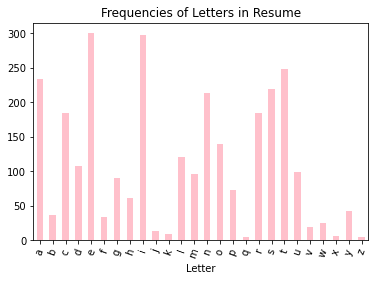

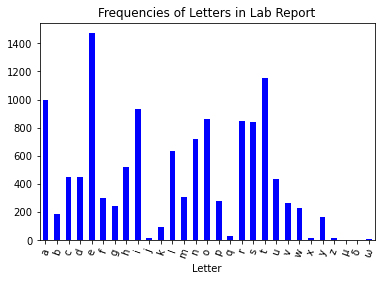

In [159]:
%matplotlib inline

def BarGraph(df, Title, Color, Y):
    bar_graph = df.plot.bar(x = "Letter", y = Y, rot = 70, title = Title, color = Color, legend = False)

BarGraph(EssayFrequency_df, "Frequencies of Letters in Essay", "purple", 'Essay Frequency')

BarGraph(ResumeFrequency_df, "Frequencies of Letters in Resume", "pink", 'Resume Frequency')

BarGraph(LabFrequency_df, "Frequencies of Letters in Lab Report", "blue", 'Lab Frequency')


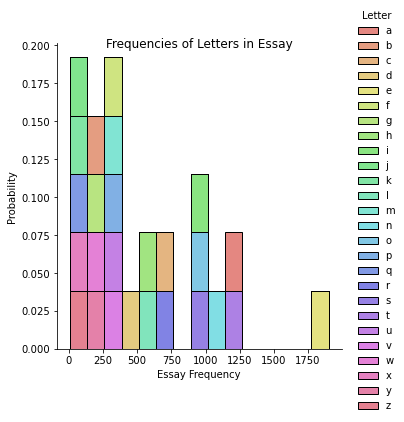

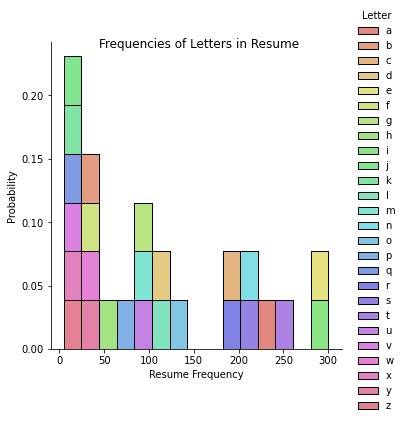

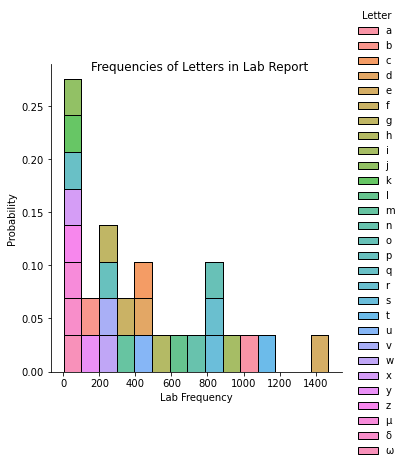

In [162]:
%matplotlib inline

sns.set_palette("hls", 26)

def histogram(df, Title, X):
    hist = sns.displot(df, x = X, bins = 15, hue = 'Letter', multiple = 'stack', stat = 'probability')
    hist.fig.suptitle(Title)
    
histogram(EssayFrequency_df, "Frequencies of Letters in Essay", 'Essay Frequency')
histogram(ResumeFrequency_df, "Frequencies of Letters in Resume", 'Resume Frequency')
histogram(LabFrequency_df, "Frequencies of Letters in Lab Report", 'Lab Frequency')



In [128]:
#(
#ggplot(EssayFrequency_df, aes(x = 'Frequency', y = after_stat('count'), fill = 'Letter'))
#+ geom_histogram(bins = 15, color = "black")
#+ geom_text(position = position_stack(vjust = 5))

#)

